In [244]:
#%pip install plotly

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Breast cancer detection using data

In [3]:
data= pd.read_csv("Breast_Cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Exploratory data analysis 

In [4]:
#data has 568 rows and 32 coloumns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [209]:
data['Unnamed: 32'].unique() #all are null values
#dropping this column and the id column
data=data.drop(columns=['Unnamed: 32','id'],axis=1)

In [210]:
#target variable is not that much imbalanced
data['diagnosis'].value_counts() 

B    357
M    212
Name: diagnosis, dtype: int64

In [211]:
#no null values in the dataset
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [212]:
#changing the diagonisis coloumn variable using labelencorder
data['diagnosis']=LabelEncoder().fit_transform(data['diagnosis']) #malignant to 1 and Benign to 0
data['diagnosis'].unique()

array([1, 0])

In [213]:
#define the features and target variable
X=data.drop(columns='diagnosis')
Y=data['diagnosis']

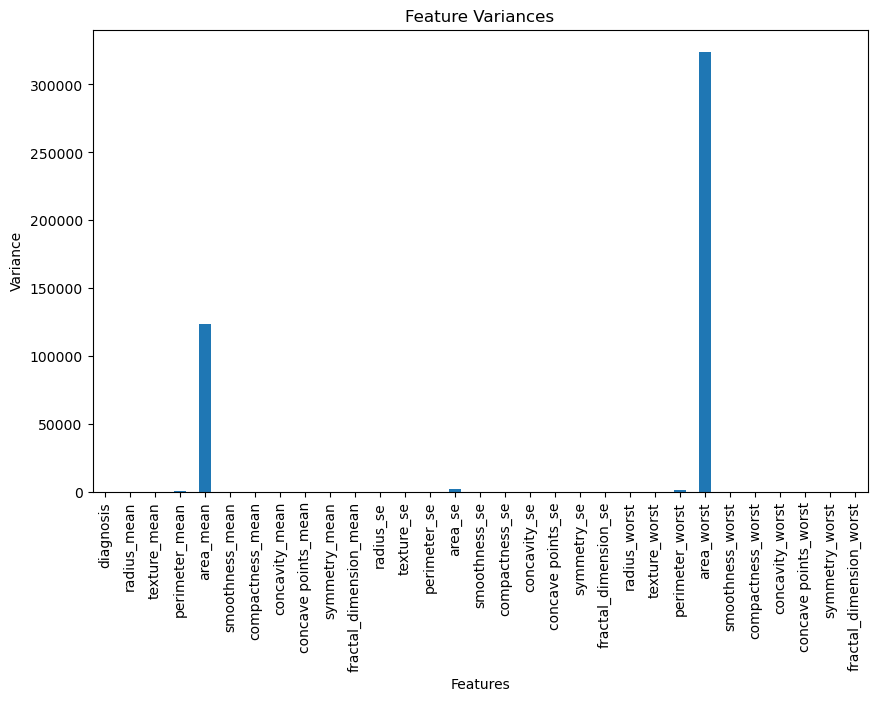

In [214]:
#plotted variancle of each variable
#found features that will be good for modelling
def plot_variance(data):
    variances = data.var()
    variances.plot(kind='bar', figsize=(10, 6), title='Feature Variances')
    plt.xlabel('Features')
    plt.ylabel('Variance')
    plt.show()   
  
plot_variance(data)

In [215]:
#calculates the Mutual Information (MI) score between each feature and the target variable
#information shared between variables
def make_mi_score(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores_df =pd.DataFrame(mi_scores,columns=['Score'],index=X.columns)
    mi_scores_df = mi_scores_df.sort_values(by='Score', ascending=False)
    mi_scores_df.index.name = 'Feature'
    return mi_scores_df
mi_score=make_mi_score(X,Y)
mi_score

,Score
Feature,
perimeter_worst,0.479081
area_worst,0.465433
radius_worst,0.456072
concave points_mean,0.440606
concave points_worst,0.438052
perimeter_mean,0.402442
concavity_mean,0.374324
radius_mean,0.363932
area_mean,0.359871


In [216]:
#selecting only features which have mi_score .0.10
selected_columns = mi_score[mi_score['Score'] >= 0.10].index.tolist()
#updating the feature variables with the selceted columns 
X=data[selected_columns]
X.columns

Index(['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_mean',
       'concave points_worst', 'perimeter_mean', 'concavity_mean',
       'radius_mean', 'area_mean', 'area_se', 'concavity_worst',
       'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean',
       'concave points_se', 'texture_worst', 'concavity_se',
       'smoothness_worst'],
      dtype='object')

Text(0.5, 1.0, 'Feature var. Correlation with Target')

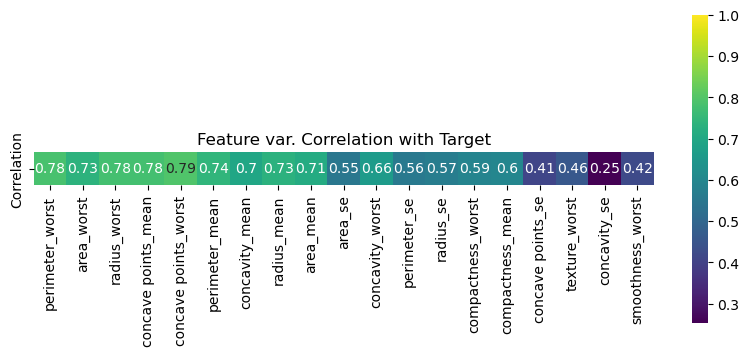

In [279]:
#plotted correcaion between X and Y
correlation=X.corrwith(Y)
correlation_df = pd.DataFrame(correlation, columns=['Correlation'])
plt.figure(figsize=(10,4))
sns.heatmap(correlation_df.transpose(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Feature var. Correlation with Target')

In [280]:
#scale X variables
X_scaled=StandardScaler().fit_transform(X)
X_scaled

array([[ 2.30360062,  2.00123749,  1.88668963, ..., -1.35929347,
         0.72402616,  1.30768627],
       [ 1.53512599,  1.89048899,  1.80592744, ..., -0.36920322,
        -0.44078006, -0.37561196],
       [ 1.34747521,  1.45628455,  1.51187025, ..., -0.02397438,
         0.21307643,  0.52740741],
       ...,
       [ 0.57900058,  0.42790561,  0.56136143, ...,  1.37485378,
         0.5108265 , -0.80958728],
       [ 2.30360062,  1.65317077,  1.96123934, ...,  2.23792588,
         1.30228464,  1.43042677],
       [-1.43273495, -1.07581292, -1.41089258, ...,  0.76418957,
        -1.05750068, -1.85901852]])

Principal component analysis

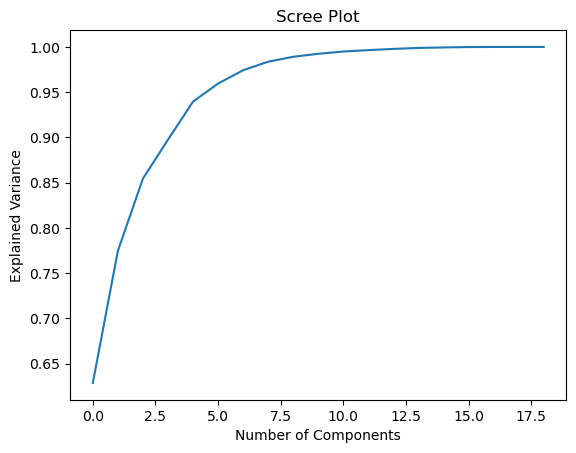

In [281]:
#finding the optimum no of components to be applied in PCA using scree plot
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

*We can find in around 7.5 to 10  where adding more components does not significantly increase the explained variance.*
*To find the exact no of components which can explain 95% variance we use explained variance threshold method*

In [282]:
#optimum no of components 
pca = PCA(n_components=0.95) # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print("Number of components to retain 95% variance:", pca.n_components_)

Number of components to retain 95% variance: 6


In [283]:
#using 3compnents for 18 features 
pca= PCA(n_components=5)
pca.fit(X_scaled)

PCA(n_components=5)

In [284]:
x_pca=pca.transform(X_scaled)

In [285]:
#checking the shape x_pca
x_pca.shape

(569, 5)

*Principal component Analysis reduced the variables to 5*

In [286]:
#an interactive plot created
#displys all 5 principal components
fig = go.Figure(data=[go.Scatter3d(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    z=x_pca[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=x_pca[:, 3],  # Use PCA 4 for color mapping
        colorscale='Viridis',
        opacity=0.8,
    )
)])
component_labels = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5']
hover_text = [f'{label}: {val:.2f}' for label, val in zip(component_labels, x_pca[:, 3])]
fig.update_traces(text=hover_text, hoverinfo='text')

#Set axis labels 
fig.update_layout(scene=dict(
    xaxis_title='First Principal Component',
    yaxis_title='Second Principal Component',
    zaxis_title='Third Principal Component'
))
fig.show()


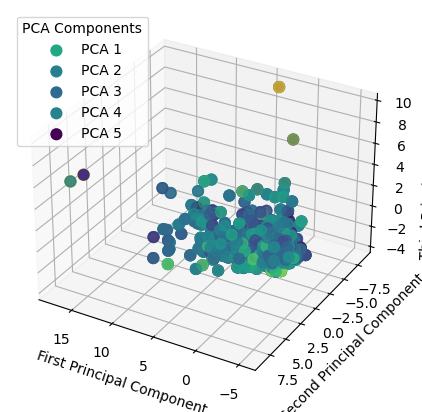

In [287]:
#same plot in 2d figure
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
component_labels = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5']
scatter_plots = []
for i in range(5):
    scatter_plot = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=x_pca[:, i], cmap='viridis', s=60)#
    scatter_plots.append(scatter_plot)

ax.legend(handles=scatter_plots, labels=component_labels, title='PCA Components')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)
plt.show()


In [288]:
#datafraem including 5 pc and the selected features
X_upd=pd.DataFrame(pca.components_, columns=X.columns)
X_upd.head(10)
#shape(5,18)

,perimeter_worst,area_worst,radius_worst,concave points_mean,concave points_worst,perimeter_mean,concavity_mean,radius_mean,area_mean,area_se,concavity_worst,perimeter_se,radius_se,compactness_worst,compactness_mean,concave points_se,texture_worst,concavity_se,smoothness_worst
0,0.270515,0.261054,0.264054,0.275335,0.261043,0.263671,0.261349,0.257116,0.259247,0.231065,0.224622,0.231768,0.228094,0.197048,0.227812,0.176962,0.106747,0.137320,0.109406
1,0.160938,0.213455,0.193380,-0.058916,-0.157351,0.189469,-0.200129,0.216993,0.232651,0.224969,-0.315058,0.148243,0.179656,-0.348678,-0.300076,-0.228248,-0.042992,-0.336375,-0.320792
2,-0.141737,-0.114322,-0.155024,-0.021975,-0.159126,-0.102162,0.081613,-0.111999,-0.067458,0.240292,-0.103298,0.329644,0.317053,-0.197991,0.013350,0.429198,-0.358694,0.414911,-0.284276
3,-0.100397,-0.032630,-0.104236,-0.032822,-0.086938,-0.217869,-0.059659,-0.233196,-0.157971,0.321363,-0.120861,0.348071,0.375735,0.001799,0.054400,-0.131063,0.404755,-0.215780,0.477760
4,-0.000998,-0.008084,-0.001289,-0.136927,-0.088556,-0.003757,0.010145,0.004771,-0.006225,-0.048725,0.089570,-0.008517,-0.028863,-0.018797,-0.150960,0.116340,0.802130,0.302623,-0.436107


Text(70.72222222222221, 0.5, 'Principal Components')

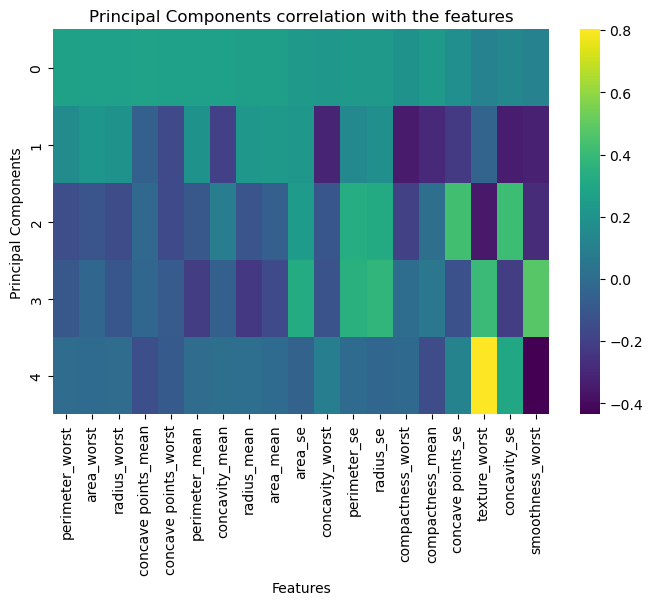

In [290]:
#Principal Components correlation with the features
plt.figure(figsize=(8,5))
sns.heatmap(X_upd, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

**Applying ML Model**<br>
Here i am using Randomforest model

In [291]:
X_train,X_test,Y_train,Y_test=train_test_split(x_pca,Y,train_size=0.8,random_state=33)
#random forest model
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)

In [292]:
accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(Y_test,Y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



*The model is able to achieve 97%accuracy.*
*Since this is a medical data I also checked the precision score as well, which is above 0.95, good one*

*I believe PCA worked well in this model prediction.*